# DataCamp Data Analyst Certification: Food Claims Analysis

## Author: [Clinton Nwokocha]
## Certification: DataCamp Data Analyst 

This notebook presents the analysis performed as part of the Data Analyst Certification course from DataCamp. 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# display outputs inline
%matplotlib inline

# see all columns, rows and entire text context
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# load dataset
food_claims = pd.read_csv('food_claims_2212.csv')

## Data Validation

In [3]:
# Display summary information about the DataFrame, including the number of non-null entries in each column and their data types.

food_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [4]:
# Check unique values in 'cause'
unique_causes = food_claims['cause'].unique()

print('Unique values in cause:', unique_causes)

# Check if all unique values are in the expected list
expected_causes = ["vegetable", "meat", "unknown"]
correct_causes = all(cause in expected_causes for cause in unique_causes)

print('Are all causes correct?', correct_causes)


Unique values in cause: ['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']
Are all causes correct? False


In [5]:
# Calculate and print the number of missing (NaN) values in the 'cause' column of the food_claims DataFrame.
food_claims['cause'].isna().sum()

0

In [6]:
# Check unique values in 'cause'
unique_causes = food_claims['cause'].unique()

print('Unique values in cause:', unique_causes)

# Check if all unique values are in the expected list
expected_causes = ["vegetable", "meat", "unknown"]
correct_causes = all(cause in expected_causes for cause in unique_causes)

print('Are all causes correct?', correct_causes)


Unique values in cause: ['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']
Are all causes correct? False


In [7]:
# Select and display a random sample of 10 rows from the food_claims DataFrame.
food_claims.sample(10)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
1046,1047,249,R$ 46246.44,41302.44,RECIFE,12,False,unknown
1345,1346,178,R$ 8419.64,7970.65,FORTALEZA,3,True,meat
1735,1736,214,R$ 31320.01,21022.77,FORTALEZA,8,False,meat
1627,1628,214,R$ 39509.72,30290.36,RECIFE,12,False,meat
1547,1548,175,R$ 48474.05,42801.63,RECIFE,12,False,unknown
734,735,159,R$ 25835.85,21406.27,RECIFE,9,False,meat
298,299,184,R$ 48905.64,42685.10,FORTALEZA,12,True,unknown
1563,1564,136,R$ 5495.45,4280.52,RECIFE,3,False,vegetable
388,389,102,R$ 3276.98,2666.33,SAO LUIS,1,False,meat
1103,1104,338,R$ 56989.26,NaN,RECIFE,11,False,unknown


In [8]:
# remove the 'R$ ' prefix and convert the values to float
food_claims['claim_amount'] = food_claims['claim_amount'].replace('R\$ ', '', regex=True).astype(float)


In [9]:
# check that all values are rounded to two decimal places
all_two_decimals = all(round(val, 2) == val for val in food_claims['claim_amount'])

print('Are all values rounded to two decimal places?', all_two_decimals)

Are all values rounded to two decimal places? True


In [10]:
food_claims['claim_amount'] = pd.to_numeric(food_claims['claim_amount'])

In [11]:
# Check unique values in 'location'
unique_locations = food_claims['location'].unique()

print('Unique values in location:', unique_locations)

# Check if all unique values are in the expected list
expected_locations = ["RECIFE", "SAO LUIS", "FORTALEZA", "NATAL"]
correct_locations = all(location in expected_locations for location in unique_locations)

print('Are all locations correct?', correct_locations)


Unique values in location: ['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
Are all locations correct? True


In [12]:
# Check if all values are integers (discrete)
all_discrete = all(isinstance(val, int) for val in food_claims['individuals_on_claim'])

# Check the minimum value in 'individuals_on_claim'
min_individuals = food_claims['individuals_on_claim'].min()

print('Are all values discrete?', all_discrete)
print('Is the minimum value 1?', min_individuals == 1)


Are all values discrete? True
Is the minimum value 1? True


In [13]:
# Calculate the median of the 'amount_paid' column in the food_claims DataFrame.
median_paid = food_claims['amount_paid'].median() 

# Replace missing values in the 'amount_paid' column with the calculated median.
food_claims['amount_paid'] = food_claims['claim_amount'].fillna(median_paid)

# Display all rows in the food_claims DataFrame where 'amount_paid' is still missing (NaN).
food_claims[food_claims['amount_paid'].isna()] 


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause


In [14]:
# Replace missing values in the 'linked_cases' column with the string 'False'.
food_claims['linked_cases'] = food_claims['linked_cases'].fillna('False')

# Display all rows in the food_claims DataFrame where 'linked_cases' is still missing (NaN).
food_claims[food_claims['linked_cases'].isna()]


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause


In [15]:
# Display all unique values in the 'cause' column of the food_claims DataFrame.
food_claims['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [16]:
# Replace specific values in the 'cause' column of the food_claims DataFrame. 
# Specifically, replacing ' Meat' with 'meat', and 'VEGETABLES' with 'vegetable'.
food_claims['cause'] = food_claims['cause'].replace({' Meat': 'meat', 'VEGETABLES':'vegetable'}, regex =True)

In [17]:
# Convert the 'time_to_close' column in the food_claims DataFrame to a numeric data type. 
# If a value cannot be converted (because it's not a valid number), it's replaced with NaN.
food_claims['time_to_close'] = pd.to_numeric(food_claims['time_to_close'], errors='coerce')


## Task 1
 
 For every column in the data:
-State whether the values match the description given in the table above.

-State the number of missing values in the column.

-Describe what you did to make values match the description if they did not

*Solution*

**claim_id**: This column is of nominal datatype, having 2000 unique and 2000 distinct values, It has no duplicates making it a perfect identifier for each claims. It had 0 missing values.It meets the criteria, no changes were made.

**time_to_close**: Values in  this column are discrete, there are no missing values, They are all positive values and meet with the description given so no changes were made.

**claim_amount**: They contained the brazilian currency symbol, had no missing values and were rounded to 2 decimal places, the brazilian currency symbol was stripped off of each value and added to the column to make it more descriptive and keep the values numeric.

**amount_paid**: The values were continuous and rounded to two decimal places are required by the criteria, missing values in this column were 36 in numbers and they were replaced with the overall median amount paid which is '20105.70' rounded to 2 decimal places, the brazilian currency symbol wa added to the column name to make it more descriptive.

**location**: The values in this column were nominal, it has 4 unique values which are 'RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL' and corresponds with those in the description, there are missing values and no changes were made.

**individuals_on_claim**: The values were discrete, The minimum value is 1 and there are no missing values which meets the criteria so no changes were made.

**linked_cases**: Its values were nominal and matched the description, It had 26 missing values which were replaced with FALSE.

**cause**: Its values were nominal, it had no missing values, it had 5 unique values which contradicts its description, the five values were 'unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES', the odd ones are 'Meat' and 'VEGETABLES' and they were replaced with 'meat' and 'vegetable'.



## Task 2
Create a visualization that shows the number of claims in each location. Use the visualization to:
- State which category of the variable location has the most observations

-Explain whether the observations are balanced across categories of the variable location

*Solution* 

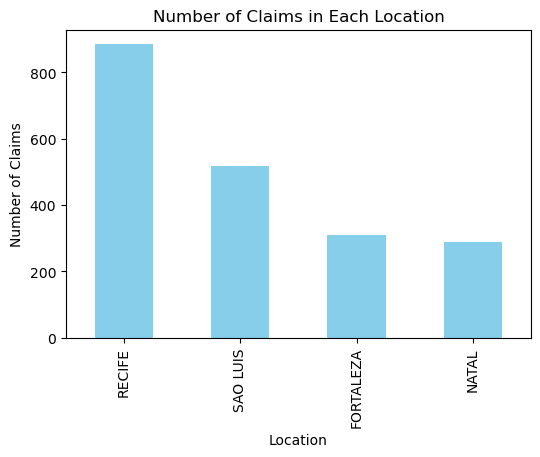

In [18]:
# count the number of claims in each location
location_counts = food_claims['location'].value_counts()

# create a bar plot
plt.figure(figsize=(6,4))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Claims in Each Location')
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.show()


Below are the counts of claim for each location, with RECIFE having the most  claims amongst the four locations;
- RECIFE       885
- SAO LUIS     517
- FORTALEZA    311
- NATAL        287

The claims are not balanced across categories of the location variable. They vary significantly among the locations. RRECIFE has more than three times the number of claims as NATAL, similar trend though of lesser difference is observed across other locations.


## Task 3

Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

**Solution**

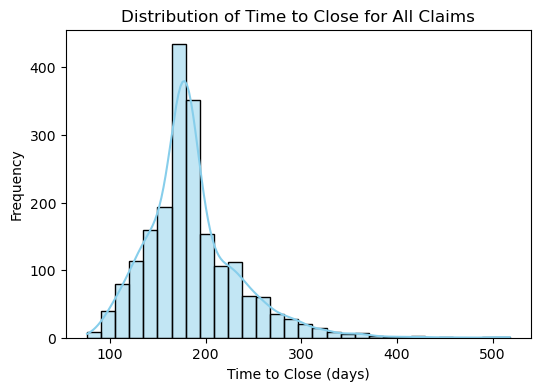

In [19]:

plt.figure(figsize=(6,4))
sns.histplot(food_claims['time_to_close'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Time to Close for All Claims')
plt.xlabel('Time to Close (days)')
plt.ylabel('Frequency')
plt.show()


The distribution of time to close is positively skewed, this indicates that there are relatively fewer claims with shorter times to close and a higher frequency of claims with longer times to close.
The peak of the distribution, as indicated by the highest frequency at 150 and 160, is towards the right side of the distribution. This means that a significant number of claims have relatively longer times to close.
The spread of the data, ranging from 95 to 537, suggests that the times to close for the claims vary widely. There are claims with relatively shorter times to close (as low as 95) and claims with longer times to close (up to 537).
This suggests that the times to close for the claims span a relatively wide range.The legal team should focus on reducing the overall closure time and addressing the cases with longer durations to improve efficiency.

## Task 4

Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

**Solution**

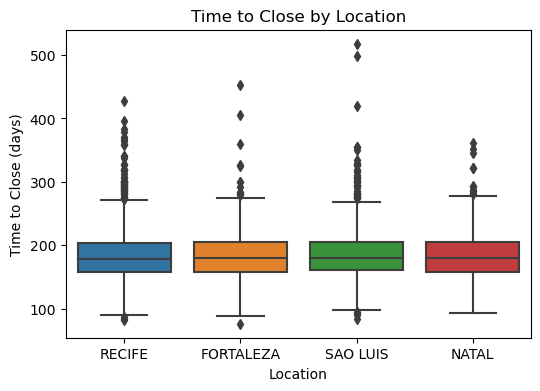

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='location', y='time_to_close', data=food_claims)
plt.title('Time to Close by Location')
plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.show()

Mean values for time to close are relatively similar across the different locations. However, there are variations in the presence of outliers, with São Luís having the most outliers, followed by Fortaleza, Recife, and Natal with the least.

This indicates that there might be some differences in the distribution of time to close across locations, particularly in terms of the presence of extreme values or anomalies. The higher number of outliers in São Luís and Fortaleza suggests a potentially wider spread or greater variability in the time it takes to close claims in those locations compared to Recife and Natal.The legal team should focus on improving the overall claim closure time across all locations rather than emphasizing specific locations.
